In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

In [2]:
train_df = pd.read_csv("/Users/anchanghun/Downloads/UNSW-NB15/CSV Files/UNSW-NB15/UNSW_NB15_training-set.csv")

In [3]:
test_df = pd.read_csv("/Users/anchanghun/Downloads/UNSW-NB15/CSV Files/UNSW-NB15/UNSW_NB15_testing-set.csv")


In [4]:
df=pd.concat([train_df, test_df], axis=0)

In [5]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding 적용
label_encoder = LabelEncoder()
df['proto'] = label_encoder.fit_transform(df['proto'])
df['state'] = label_encoder.fit_transform(df['state'])
df['service'] = label_encoder.fit_transform(df['service'])
df['attack_cat'] = label_encoder.fit_transform(df['attack_cat'])

# 인코딩된 데이터프레임 확인
print(df.head())

   id       dur  proto  service  state  spkts  dpkts  sbytes  dbytes  \
0   1  0.121478    113        0      4      6      4     258     172   
1   2  0.649902    113        0      4     14     38     734   42014   
2   3  1.623129    113        0      4      8     16     364   13186   
3   4  1.681642    113        3      4     12     12     628     770   
4   5  0.449454    113        0      4     10      6     534     268   

        rate  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  \
0  74.087490  ...                 1               1             0           0   
1  78.473372  ...                 1               2             0           0   
2  14.170161  ...                 1               3             0           0   
3  13.677108  ...                 1               3             1           1   
4  33.373826  ...                 1              40             0           0   

   ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  attack_cat  \
0   

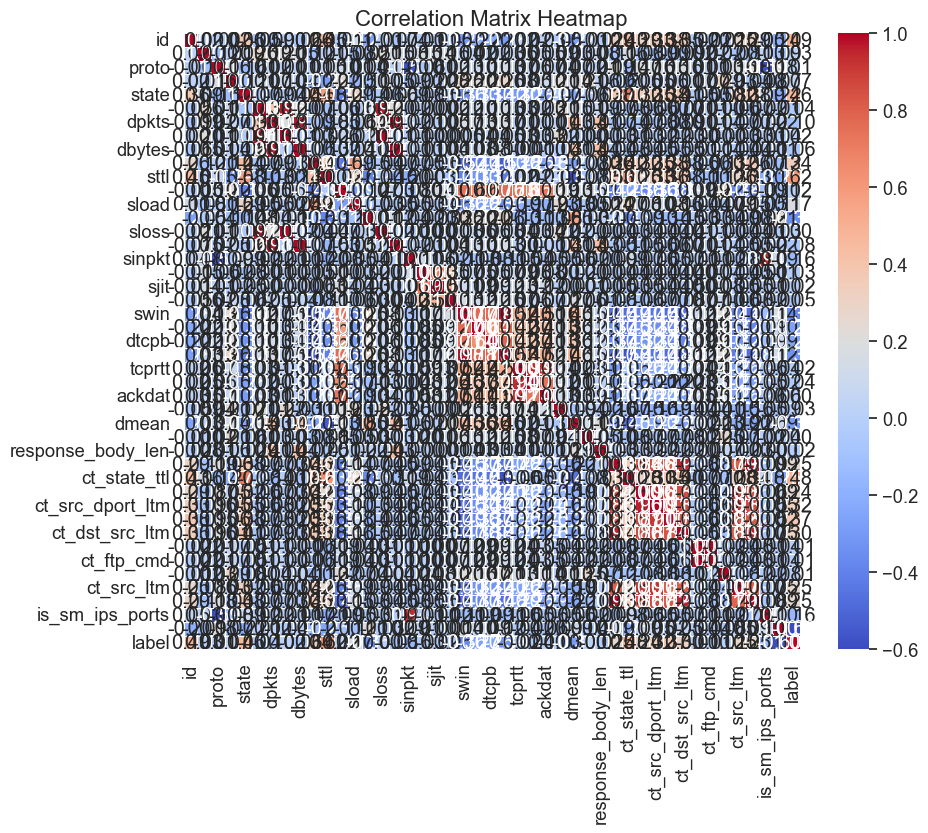

In [14]:
# 상관 행렬 계산
df_corr = df.corr()

# 상관 행렬 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  # 폰트 크기 조정
heatmap = sns.heatmap(df_corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, linewidths=0.5)

# 히트맵 제목 설정
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

In [15]:
df_corr['label']>=0.1

id                    True
dur                  False
proto                False
service              False
state                 True
spkts                False
dpkts                False
sbytes               False
dbytes               False
rate                  True
sttl                  True
dttl                 False
sload                 True
dload                False
sloss                False
dloss                False
sinpkt               False
dinpkt               False
sjit                 False
djit                 False
swin                 False
stcpb                False
dtcpb                False
dwin                 False
tcprtt               False
synack               False
ackdat               False
smean                False
dmean                False
trans_depth          False
response_body_len    False
ct_srv_src            True
ct_state_ttl          True
ct_dst_ltm            True
ct_src_dport_ltm      True
ct_dst_sport_ltm      True
ct_dst_src_ltm        True
i

In [16]:
df_corr['label']<=-0.1

id                   False
dur                  False
proto                False
service              False
state                False
spkts                False
dpkts                False
sbytes               False
dbytes               False
rate                 False
sttl                 False
dttl                 False
sload                False
dload                 True
sloss                False
dloss                False
sinpkt                True
dinpkt               False
sjit                 False
djit                 False
swin                  True
stcpb                 True
dtcpb                 True
dwin                  True
tcprtt               False
synack               False
ackdat               False
smean                False
dmean                 True
trans_depth          False
response_body_len    False
ct_srv_src           False
ct_state_ttl         False
ct_dst_ltm           False
ct_src_dport_ltm     False
ct_dst_sport_ltm     False
ct_dst_src_ltm       False
i

In [22]:
df_corr['label']

id                   0.490584
dur                  0.029096
proto                0.008023
service              0.073552
state                0.462972
spkts               -0.043040
dpkts               -0.097394
sbytes               0.019376
dbytes              -0.060403
rate                 0.335883
sttl                 0.624082
dttl                 0.019369
sload                0.165249
dload               -0.352169
sloss                0.001828
dloss               -0.075961
sinpkt              -0.155454
dinpkt              -0.030136
sjit                -0.016436
djit                -0.048819
swin                -0.364877
stcpb               -0.266585
dtcpb               -0.263543
dwin                -0.339166
tcprtt              -0.024668
synack              -0.043250
ackdat               0.000817
smean               -0.028372
dmean               -0.295173
trans_depth          0.002246
response_body_len   -0.018930
ct_srv_src           0.246596
ct_state_ttl         0.476559
ct_dst_ltm

In [30]:
# 조건을 만족하는 컬럼들을 필터링하여 출력
filtered_columns = df_corr.columns[abs(df_corr['label']) >= 0.3]
print(filtered_columns)

Index(['id', 'state', 'rate', 'sttl', 'dload', 'swin', 'dwin', 'ct_state_ttl',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'attack_cat', 'label'],
      dtype='object')
